# Fleet modeling

This notebook aims at using the classes dedicated to the fleet modelling that are used in AeroMAPS.

In [1]:
from aeromaps.models.air_transport.aircraft_fleet_and_operations.fleet.fleet_model import (
    AircraftParameters,
    SubcategoryParameters,
    CategoryParameters,
    Aircraft,
    SubCategory,
    Category,
    Fleet,
    FleetModel,
)

from aeromaps.models.parameters import YearParameters

year_parameters = YearParameters(
    historic_start_year=2020, prospection_start_year=2020, end_year=2050
)

from aeromaps.models.air_transport.constants import EnergyTypes

import pandas as pd

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

Lets create the following categories and subcategories of aircraft:
- Short range:
    - Narrow-body
    - Regional Turboprop
    - Regional Turbofan
- Medium range (Narrow-body)
- Long range (Wide-body)

Lets now assemble these categories into a fleet object.

In [2]:
fleet = Fleet()

In [3]:
fleet.ui

In [4]:
print(list(list(fleet.categories.values())[0].subcategories[0].aircraft.values())[0].name)
list(list(fleet.categories.values())[0].subcategories[0].aircraft.values())[0].parameters
# list(fleet.categories.values())[0].subcategories[0].datagrid.data

New Narrow-body 1


AircraftParameters(entry_into_service_year='2035', consumption_gain='15.0', nox_gain='30.0', soot_gain='30.0')

In [5]:
fleet_model = FleetModel(fleet=fleet, year_parameters=year_parameters)
fleet_model.compute()
fleet_model.df

/Users/s.delbecq/PycharmProjects/AeroMAPS/aeromaps/models/air_transport/aircraft_fleet_and_operations/fleet/fleet_model.py:608: RuntimeWarning: invalid value encountered in scalar divide
  ] / (self.df.loc[k, category.name + ":share:dropin_fuel"] / 100) + self.df.loc[
/Users/s.delbecq/PycharmProjects/AeroMAPS/aeromaps/models/air_transport/aircraft_fleet_and_operations/fleet/fleet_model.py:608: RuntimeWarning: invalid value encountered in scalar divide
  ] / (self.df.loc[k, category.name + ":share:dropin_fuel"] / 100) + self.df.loc[
/Users/s.delbecq/PycharmProjects/AeroMAPS/aeromaps/models/air_transport/aircraft_fleet_and_operations/fleet/fleet_model.py:608: RuntimeWarning: invalid value encountered in scalar divide
  ] / (self.df.loc[k, category.name + ":share:dropin_fuel"] / 100) + self.df.loc[
/Users/s.delbecq/PycharmProjects/AeroMAPS/aeromaps/models/air_transport/aircraft_fleet_and_operations/fleet/fleet_model.py:608: RuntimeWarning: invalid value encountered in scalar divide
  ] / 

,Short Range:Conventional narrow-body:recent_reference:single_aircraft_share,Short Range:Conventional narrow-body:old_reference:single_aircraft_share,Short Range:Conventional narrow-body:New Narrow-body 1:single_aircraft_share,Short Range:Conventional narrow-body:New Narrow-body 2:single_aircraft_share,Medium Range:Conventional narrow-body:recent_reference:single_aircraft_share,Medium Range:Conventional narrow-body:old_reference:single_aircraft_share,Medium Range:Conventional narrow-body:New Medium-range 1:single_aircraft_share,Medium Range:Conventional narrow-body:New Medium-range 2:single_aircraft_share,Long Range:Conventional wide-body:recent_reference:single_aircraft_share,Long Range:Conventional wide-body:old_reference:single_aircraft_share,Long Range:Conventional wide-body:New Long-range 1:single_aircraft_share,Long Range:Conventional wide-body:New Long-range 2:single_aircraft_share,Short Range:Conventional narrow-body:New Narrow-body 2:aircraft_share,Short Range:Conventional narrow-body:New Narrow-body 1:aircraft_share,Short Range:Conventional narrow-body:recent_reference:aircraft_share,Short Range:Conventional narrow-body:old_reference:aircraft_share,Medium Range:Conventional narrow-body:New Medium-range 2:aircraft_share,Medium Range:Conventional narrow-body:New Medium-range 1:aircraft_share,Medium Range:Conventional narrow-body:recent_reference:aircraft_share,Medium Range:Conventional narrow-body:old_reference:aircraft_share,Long Range:Conventional wide-body:New Long-range 2:aircraft_share,Long Range:Conventional wide-body:New Long-range 1:aircraft_share,Long Range:Conventional wide-body:recent_reference:aircraft_share,Long Range:Conventional wide-body:old_reference:aircraft_share,Short Range:Conventional narrow-body:share:dropin_fuel,Short Range:Conventional narrow-body:share:hydrogen,Short Range:Conventional narrow-body:energy_consumption,Short Range:Conventional narrow-body:energy_consumption:dropin_fuel,Short Range:Conventional narrow-body:energy_consumption:hydrogen,Short Range:share:dropin_fuel,Short Range:share:hydrogen,Short Range:energy_consumption:dropin_fuel,Short Range:energy_consumption:hydrogen,Short Range:energy_consumption,Medium Range:Conventional narrow-body:share:dropin_fuel,Medium Range:Conventional narrow-body:share:hydrogen,Medium Range:Conventional narrow-body:energy_consumption,Medium Range:Conventional narrow-body:energy_consumption:dropin_fuel,Medium Range:Conventional narrow-body:energy_consumption:hydrogen,Medium Range:share:dropin_fuel,Medium Range:share:hydrogen,Medium Range:energy_consumption:dropin_fuel,Medium Range:energy_consumption:hydrogen,Medium Range:energy_consumption,Long Range:Conventional wide-body:share:dropin_fuel,Long Range:Conventional wide-body:share:hydrogen,Long Range:Conventional wide-body:energy_consumption,Long Range:Conventional wide-body:energy_consumption:dropin_fuel,Long Range:Conventional wide-body:energy_consumption:hydrogen,Long Range:share:dropin_fuel,Long Range:share:hydrogen,Long Range:energy_consumption:dropin_fuel,Long Range:energy_consumption:hydrogen,Long Range:energy_consumption,global_fleet:energy_consumption
2020,52.876766,100,0.000000,0.000000,29.166009,100,0.000000,0.000000,35.913905,100,0.000000,0.000000,0.000000,0.000000,52.876766,47.123234,0.000000,0.000000,29.166009,70.833991,0.000000,0.000000,35.913905,64.086095,100.0,0.0,1.088927,1.088927,0.0,100.0,0.0,0.0,0.0,NaN,100.0,0.0,0.852613,0.852613,0.0,100.0,0.0,0.0,0.0,NaN,100.0,0.0,0.994180,0.994180,0.0,100.0,0.0,0.0,0.0,NaN,NaN
2021,60.504799,100,0.000000,0.000000,35.985595,100,0.000000,0.000000,43.345777,100,0.000000,0.000000,0.000000,0.000000,60.504799,39.495201,0.000000,0.000000,35.985595,64.014405,0.000000,0.000000,43.345777,56.654223,100.0,0.0,1.066086,1.066086,0.0,100.0,0.0,0.0,0.0,NaN,100.0,0.0,0.837720,0.837720,0.0,100.0,0.0,0.0,0.0,NaN,100.0,0.0,0.974772,0.974772,0.0,100.0,0.0,0.0,0.0,NaN,NaN
2022,67.653409,100,0.000000,0.000000,43.422251,100,0.000000,0.000000,51.089537,100,0.000000,0.00

In [6]:
# Gains summary
df = fleet_model.df[["global_fleet:energy_consumption"]]
df = fleet_model.df[["Medium Range:Conventional narrow-body:energy_consumption"]]
gains_2035 = (1 - df.loc[2035] / df.loc[2020]) * 100
gains_2050 = (1 - df.loc[2050] / df.loc[2020]) * 100
annual_gains = 100 * (1 - (1 + (df.loc[2050] / df.loc[2020] - 1)) ** (1 / (2050 - 2020)))


print("Gains in 2035 w.r.t 2020: ", float(gains_2035), " [%]")
print("Gains in 2050 w.r.t 2020: ", float(gains_2050), " [%]")
print("Mean annual gains between 2020 and 2050: ", float(annual_gains), " [%]")
# print(fleet_model.df[["Medium Range:Conventional narrow-body:energy_consumption", "Medium Range:Conventional narrow-body:recent_reference:single_aircraft_share"]])
# print(fleet_model.df[["Medium Range:Conventional narrow-body:old_reference:single_aircraft_share", "Medium Range:Conventional narrow-body:recent_reference:single_aircraft_share", "Medium Range:Conventional narrow-body:New Medium-range 1:single_aircraft_share", "Medium Range:Conventional narrow-body:New Medium-range 2:single_aircraft_share"]])
# fleet_model.df[["Medium Range:Conventional narrow-body:old_reference:single_aircraft_share", "Medium Range:Conventional narrow-body:recent_reference:single_aircraft_share", "Medium Range:Conventional narrow-body:New Medium-range 1:single_aircraft_share", "Medium Range:Conventional narrow-body:New Medium-range 2:single_aircraft_share"]]
fleet_model.df[["Medium Range:Conventional narrow-body:old_reference:aircraft_share", "Medium Range:Conventional narrow-body:recent_reference:aircraft_share", "Medium Range:Conventional narrow-body:New Medium-range 1:aircraft_share", "Medium Range:Conventional narrow-body:New Medium-range 2:aircraft_share", "Medium Range:New subcategory:New aircraft:aircraft_share"]]

Gains in 2035 w.r.t 2020:  17.818587389686225  [%]
Gains in 2050 w.r.t 2020:  27.63600081984109  [%]
Mean annual gains between 2020 and 2050:  1.0724124101937904  [%]


KeyError: "['Medium Range:New subcategory:New aircraft:aircraft_share'] not in index"

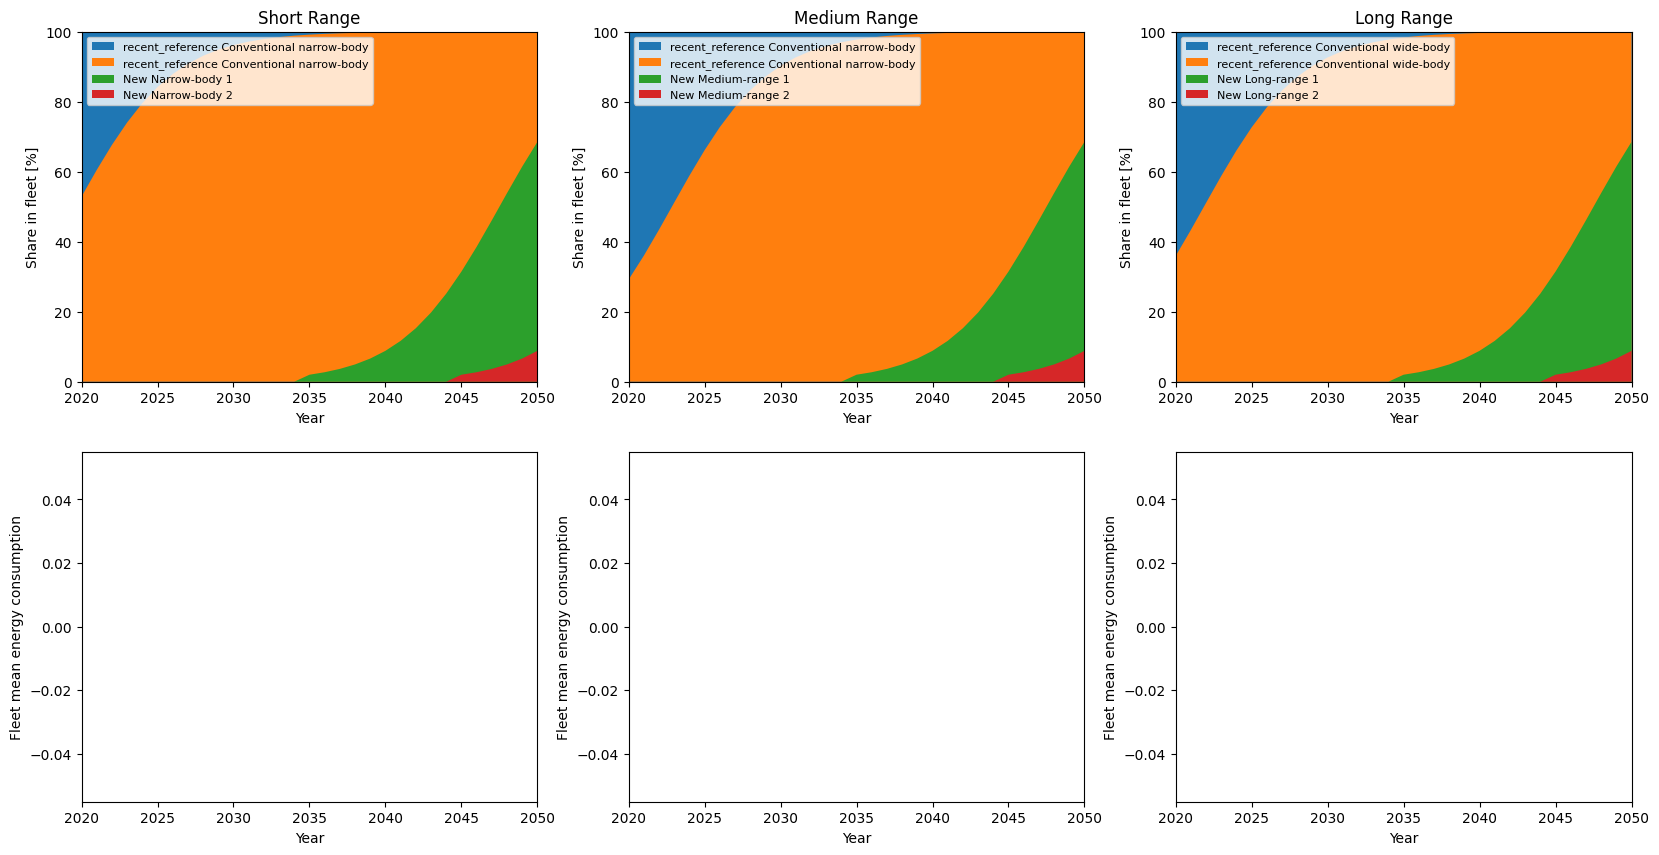

In [7]:
fleet_model.plot()